In [0]:
#Hey what up,people! Hope you're having a good day! 
#Here I'm gonna show ya how to set up YOLOv3 the darknet version on Colab
#And use it to process images, video, and, especially, TRAIN your models!!
#You can contant me at https://twitter.com/Ivangrov, if you have questions
#Or something's not working
#Are you excited? Let's go!
#Don't forget to select GPU! 


#First, let's get some updates
!apt-get update
!apt-get upgrade

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Get:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release [564 B]
Get:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release.gpg [801 B]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [83.2 kB]
Get:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Packages [35.8 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:13

In [0]:
#Now here's some important stuff: after long and painful trial and error
#I found that OpenCV can only really be installed through apt-get if you 
#intsall this stuff first , got no idea which libraries are actually useful
#here though, to be frank, but everything works only after this step! =) 


!apt-get install build-essential
!apt-get install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2).
pkg-config is already the newest version (0.29.1-0ubuntu2).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libavcodec-dev is already the newest version (7:3.4.4-0ubuntu0.18.04.1).
libavcodec-dev set to manually installed.
libavformat-dev is already the newest version (7:3.4.4-0ubuntu0.18.04.1).
libavformat-dev set to manually installed.
libswscale-dev is already the newest version (7:3.4.4-0ubuntu0.18.04.1).
libswscale-dev set to manually installed.
The following additional packages will be installed:
  autoconf automake autopoint autotools-dev debhelper dh-autoreconf
  dh-strip-nondeterminism file gettext gette

In [0]:
#And some more...
!apt-get install libavcodec-dev libavformat-dev libswscale-d

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libswscale-d


In [0]:
!apt-get -y install cmake
!which cmake

!cmake --version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.
/usr/local/bin/cmake
cmake version 3.12.0

CMake suite maintained and supported by Kitware (kitware.com/cmake).


In [0]:
#Installing OpenCV
!apt-get install libopencv-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.


In [0]:
#Now let's clone Darknet fork from AlexeyAB that let's us put in the -dont_show flag
#That turns out to be quite handy, since we've got no display here :D
!git clone https://github.com/AlexeyAB/darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8040 (delta 0), reused 1 (delta 0), pack-reused 8034
Receiving objects: 100% (8040/8040), 8.42 MiB | 19.63 MiB/s, done.
Resolving deltas: 100% (5383/5383), done.


In [0]:
#!cat throws an error on Makefile, so I use !vim to verify whether we 
#actually successfuly modified the Makefile
!apt-get install vim

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgpm2 vim-common vim-runtime xxd
Suggested packages:
  gpm ctags vim-doc vim-scripts
The following NEW packages will be installed:
  libgpm2 vim vim-common vim-runtime xxd
0 upgraded, 5 newly installed, 0 to remove and 2 not upgraded.
Need to get 6,723 kB of archives.
After this operation, 32.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 xxd amd64 2:8.0.1453-1ubuntu1 [49.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 vim-common all 2:8.0.1453-1ubuntu1 [70.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgpm2 amd64 1.20.7-5 [15.1 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 vim-runtime all 2:8.0.1453-1ubuntu1 [5,437 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/main amd64 vim amd64 2:8.0.1453-1ubuntu1 [1,152 kB]
Fetched 6,723 kB i

In [0]:
#Uncomment !vim line to check the Makefile, beware that you'll need to
#manually puase this cell to move forward

%cd darknet
#!vim Makefile


/content/darknet


In [0]:
#Now let's get some YOLOv3 weights from the official site
!ls
!wget https://pjreddie.com/media/files/yolov3.weights

3rdparty    data	     Makefile	      scripts
build	    image_yolov2.sh  mjpeg_stream.sh  src
cfg	    image_yolov3.sh  net_cam_v3.sh    video_v2.sh
darknet.py  LICENSE	     README.md	      video_yolov3.sh
--2018-12-19 15:19:19--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  96.9MB/s    in 2.4s    

2018-12-19 15:19:21 (96.9 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [0]:
#No here we're modifying the makefile to set OPENCV and GPU to 1
!ls
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile

3rdparty    data	     Makefile	      scripts	       yolov3.weights
build	    image_yolov2.sh  mjpeg_stream.sh  src
cfg	    image_yolov3.sh  net_cam_v3.sh    video_v2.sh
darknet.py  LICENSE	     README.md	      video_yolov3.sh


In [0]:
#Uncomment to check whether it worked, needs to be stopped manually 
#!vim Makefile

In [0]:
#Going to the parent directory
!ls
%cd ../
!ls

3rdparty    data	     Makefile	      scripts	       yolov3.weights
build	    image_yolov2.sh  mjpeg_stream.sh  src
cfg	    image_yolov3.sh  net_cam_v3.sh    video_v2.sh
darknet.py  LICENSE	     README.md	      video_yolov3.sh
/content
darknet  sample_data


In [0]:
!apt install g++-5
!apt install gcc-5

!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 10
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 20
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 10
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 20
!update-alternatives --install /usr/bin/cc cc /usr/bin/gcc 30
!update-alternatives --set cc /usr/bin/gcc
!update-alternatives --install /usr/bin/c++ c++ /usr/bin/g++ 30
!update-alternatives --set c++ /usr/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++-5 is already the newest version (5.5.0-12ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
gcc-5 is already the newest version (5.5.0-12ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.


In [0]:
#Now, here's a bunch of code that takes the longest to execute here but
#It's about installing CUDA and using the beautiful Tesla K80 GPU, so that
#Will worth it

!apt update -qq;
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!apt-get update -qq

#Here were are installing compilers and creating some links
!apt-get install cuda -y -qq #gcc-5 g++-5 
#!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc
#!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++
!apt update
!apt upgrade
!apt install cuda-8.0 -y

2 packages can be upgraded. Run 'apt list --upgradable' to see them.
--2018-12-19 15:19:57--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.162.216
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.162.216|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?-qT0kp1-9E1fGj1oKOekADJY35sJ9e9OArmf0nhv8UCiLujhgZBOFhhZpmL7WfBQ7hShxK1O-7WXQUWoXigBmWUmLkl-UiVS5cce-uZkXgtYROCMfvobO9XNL17WY97HZCjYwcZJ7698LK3wB7pH5xmYL1Fivc4N_S8FkqOpiZLmOaOuIAXRFOydRdYnuB-kjnzyPE_mzCMbRElNNkVpV9jTxQ [following]
--2018-12-19 15:19:57--  https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?-qT0kp1-9E1fGj1oKOekADJ

In [0]:
#Now let's see whether the GPU is here and CUDA was successfully installed!
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

print("'sup!'")

!/usr/local/cuda/bin/nvcc --version

/device:GPU:0
'sup!'
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61


In [0]:
#Okay, if so far no crazy FBI agents are knocking on your doors asking you
#To stop playing with DARKNET we can actually go and !MAKE it

%cd darknet
!make

/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
g++  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -Ofast -DOPENCV -DGPU -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool MJPGWriter::write(const cv::Mat&)’:
./src/http_stream.cpp:186:23: warning: comparison between signed and unsigned integer expressions [-Wsign-compare]
                 if (n < outlen)
                       ^
gcc  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -Ofast -DOPENCV -DGPU -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘transpose_32x32_bits_my’:
./src/gemm.c:313:20: warning: unused variable ‘t’ [-Wunused-variable]
     unsigned x, y, t;
                    ^
./src/gemm.c: In function ‘transpose_8x8_bits_my’:
./src/gemm.c:391:20: warning: unused variable ‘t’ [-Wunused-varia

In [0]:
!ls
#Now, let's see if everything works by running it on a test image
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg


3rdparty  darknet.py	   Makefile	    results	     yolov3.weights
backup	  data		   mjpeg_stream.sh  scripts
build	  image_yolov2.sh  net_cam_v3.sh    src
cfg	  image_yolov3.sh  obj		    video_v2.sh
darknet   LICENSE	   README.md	    video_yolov3.sh
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    1

In [0]:
#Let's define some functions that will let us show images, and upload and 
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

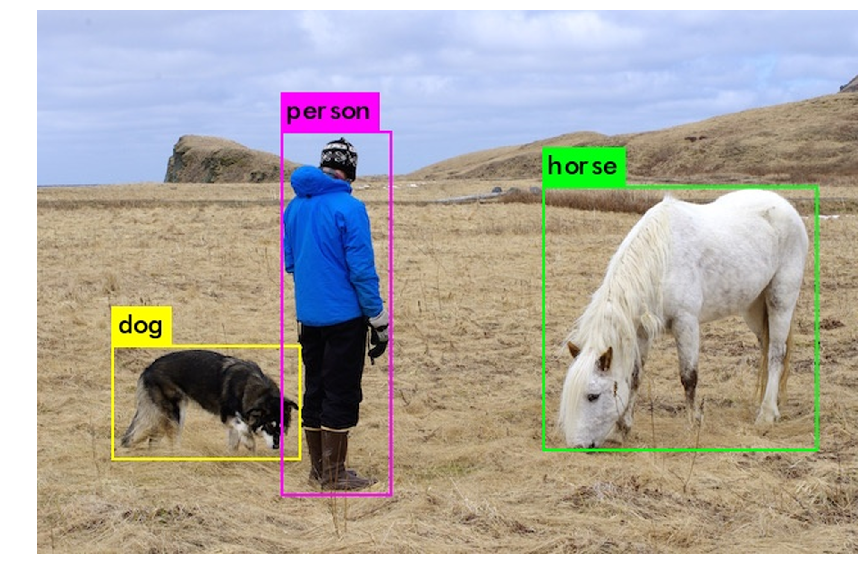

In [0]:
#You should see a person, a dog and a horse here and they might even see you.....
imShow('predictions.jpg')

In [0]:
%cd data
!ls

/content/darknet/data
9k.tree     eagle.jpg	 imagenet.labels.list	   person.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  scream.jpg
coco.names  goal.txt	 labels			   voc.names
dog.jpg     horses.jpg	 openimages.names


In [0]:
#ATTENTION! AT THIS POINT YOU'VE INSTALLED DARKNET AND IF YOU SEE THE IMAGE, IT WORKS! SO FROM NOW ON THE REST OF THE NOTEBOOK IS MADE OF TIPS AND TRICKS, AND COMMENTED CODE
#THAT I USED MYSELF, SO HERE YOU WANNA PUT EVERYTHING TOGETHER ACCORDING TO YOUR NEEDS, YOU KNOW

In [0]:
#Here's how you can mount into your Google Drive, if you wanna
#from google.colab import drive
#drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [0]:
#!./darknet detector calc_anchors data/obj.data -num_of_clusters 9 -width 416 -height 416

In [0]:
#!cat data/obj.names

In [0]:
#!ls
#upload()

In [0]:
#!wget https://pjreddie.com/media/files/darknet53.conv.74
#!ls

In [0]:
#%%capture - uncomment if you wanna supress the output
#!./darknet detector train data/obj.data yolov3-obj.cfg backup/yolov3-obj_last6.weights -dont_show

In [0]:
#Get YOLOv3-tiny weights
#!wget https://pjreddie.com/media/files/yolov3-tiny.weights
#!ls

In [0]:
#Partial the weights
#!ls
#!./darknet partial yolov3-tiny-obj.cfg yolov3-tiny.weights  yolov3-tiny.conv.15 15
#!ls

In [0]:
#Process a video names test.mp4 and save is as result3.mp4
#!./darknet detector demo data/obj.data yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_4000.weights -dont_show test.mp4 -out_filename result3.mp4

In [0]:
#Now, if you're here and it all works, then you've basically gotten yourself to the most important part:
#You have it all set up and installed and can do some damage
#Next I'll be showing how to process video and train your YOLO model here

In [0]:
#Now, let's figure out how to process some videos and then we'll get to the trainin'
#First, you gotta get the video somewhere here are your options:
#Spend a year manually coding every bit of a 'video' to Colab, upload one 
#from your machine, or download one from the Internet
#To upload one from your machine just call the upload() function, to
#download from the web use !wget and a download link

!ls
#Like this, though the video's not here
#!wget https://sv85.onlinevideoconverter.com/download?file=e4a0b1j9h7g6g6b1
!ls
#Also, don't forget to throw around a bunch of !ls's to just understand what's
#going on just a little


In [0]:
#Here in my case I had to rename the video
#!mv download?file=e4a0b1j9h7g6g6b1 fiddlevideo.mp4
#!ls

In [0]:
#Here's the command for processing video, make sure you have the weights and
#It'll be saved as result.avi

!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show fiddlevideo.mp4 -i 0 -out_filename fiddlevideo1.avi

In [0]:
#Then you can download the video to your machine, just call
#download('name_of_the_video') , and keep throwing !ls's !!
!ls

In [0]:
download('fiddlevideo1.avi')

In [0]:
#After you've trained your model you can also run it against an image
!wget https://s9.stc.all.kpcdn.net/share/i/12/10186046/inx960x640.jpg
!./darknet detector test data/obj.data yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_1000.weights inx960x640.jpg -i 0 -thresh 0.15
#Show the image
imShow('predictions.jpg')

In [0]:
#Okay, so if you're familiar with AlexeyAB's darknet fork you know that we'll
#need 5 things:
#Obj folder (training data)
#Obj.data, Obj.name file
#train.txt file
#Weights and the edited CFG model 
#Go here https://github.com/AlexeyAB/darknet/ to figure out what you need
#So, you'll basically need to edit all that stuff on your machine and prepare
#it to be  uploaded, unless you're a ninja can do that all here, which I can't -_-


# Use %cd <directory> and %cd ../ to navigate the directories to put everything
#in place

In [0]:
#Upload cfg file (make sure that you're in darknet folder)
#upload()
#and check the results:
#!ls
#Just copy this code and repeat it for as long as you need

In [0]:
#Then call
#!unzip obj.zip
#And there you have a folder with your data


In [0]:
#Now, once you've put everything in place, you can run the command, in my case that was:
!./darknet detector train data/obj.data yolov3-tiny-obj.cfg yolov3-tiny.conv.15 -dont_show
#Don't forget the dont_show flag, it's good for your health ;)

In [0]:
#Once the model's trained you can go to the backup folder
#and call download('weights') to get the trained weights you want, in my case
download('yolov3-tiny-obj_1500.weights')

In [0]:
#So, there we go! I mean, the hard part is to get everything up and going 
#And you can do pretty much anything once you did that))
#Feel free to correct the errors (when something will stop working in the future)
#And if that was useful, my dear AI wizard, go and do some good and cool stuff with it! =)